In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("data_to_MF/smiles_list_all.csv")
made_by = pd.DataFrame(data['made_by'], columns=['made_by'])
data

,SMILES,made_by
0,CN(C)c1ccc(-c2ccc(N(C)C)cc2)cc1,1/avgTC
1,CN(C)c1ccc(-c2ccc(N(C)C)cc2-c2ccc(N(C)C)cc2)cc1,1/avgTC
2,CN(C)c1ccc(-c2cc(N(C)C)ccc2-c2cc(N(C)C)ccc2-c2...,1/avgTC
3,CN(C)c1ccc(N2c3ccccc3C(C)(C)c3ccccc32)cc1,1/avgTC
4,CN(C)c1ccc(-c2cc(N(C)C)ccc2N2c3ccccc3C(C)(C)c3...,1/avgTC
...,...,...
1764,CN(C)c1ccc(-c2ccc(N(C)C)cc2-c2ccc(N(C)C)cc2-c2...,avgTC
1765,Cc1ccc2c(c1)c1cc(C)ccc1n2-c1ccc(N(C)C)cc1-c1cc...,avgTC
1766,CN(C)c1ccc(-c2ccc(N(C)C)cc2-c2ccc(N(C)C)c(-c3c...,avgTC
1767,CC(=O)c1ccc(-c2cc(N(C)C)ccc2-c2ccc(N(C)C)cc2-c...,avgTC


In [3]:
mf_2 = []
for i in range(0, len(data)):
    mol_2 = Chem.MolFromSmiles(data["SMILES"][i])
    fp_2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, 2048)
    mf_2.append(np.array(fp_2, int))

df = pd.DataFrame(mf_2)
df = df.add_prefix('MF2_')
print(df.shape)
df

(1769, 2048)


,MF2_0,MF2_1,MF2_2,MF2_3,MF2_4,MF2_5,MF2_6,MF2_7,MF2_8,MF2_9,...,MF2_2038,MF2_2039,MF2_2040,MF2_2041,MF2_2042,MF2_2043,MF2_2044,MF2_2045,MF2_2046,MF2_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = np.array(df)
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_2d)
df_tsne = df_tsne.add_prefix('TSNE_')
df_tsne

,TSNE_0,TSNE_1
0,6.092856,-5.038206
1,-7.283411,1.050393
2,-8.232173,1.072973
3,8.276369,-23.470795
4,3.911865,-31.901348
...,...,...
1764,42.621643,-24.764278
1765,7.784879,-47.213150
1766,-20.871225,-34.316490
1767,-14.501508,5.677142


In [5]:
df_tsne = pd.concat([df_tsne, made_by], axis=1, join='inner')
df_tsne.head()

,TSNE_0,TSNE_1,made_by
0,6.092856,-5.038206,1/avgTC
1,-7.283411,1.050393,1/avgTC
2,-8.232173,1.072973,1/avgTC
3,8.276369,-23.470795,1/avgTC
4,3.911865,-31.901348,1/avgTC


In [6]:
MF_tsne_avgTC = df_tsne[df_tsne['made_by'] == 'avgTC']
MF_tsne = df_tsne[df_tsne['made_by'] == '1/avgTC']

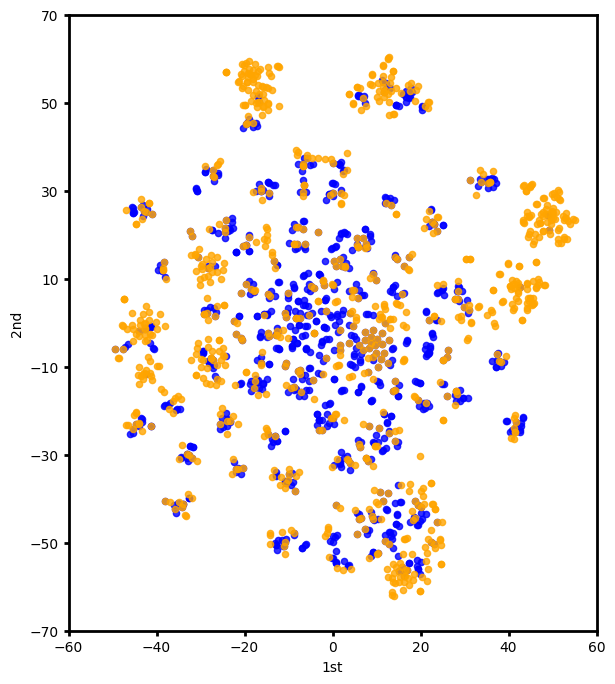

In [7]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_tsne_avgTC['TSNE_0'], MF_tsne_avgTC['TSNE_1'], color='blue', label='avgTC', s=20, alpha=0.8)
plt.scatter(MF_tsne['TSNE_0'], MF_tsne['TSNE_1'], color='orange', label='1/avgTC', s=20, alpha=0.8)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-60, 60)
plt.ylim(-70, 70)
plt.yticks(np.arange(-70, 71, 20))
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
#plt.legend()
plt.savefig('result/TSNF.png')
plt.show()